In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
#Question 1 - Describe the dataset.
This dataset has information about a student's performance in math, reading, and writing. It also shows socio-economic information and demographics.

SyntaxError: unterminated string literal (detected at line 2) (1877628830.py, line 2)

In [ ]:
#Question 1 - Target Variable
The target variables are the test scores.

In [ ]:
#Question 1 - Prediction Goal
We want to predict a student's grade based on demographic and socio-economic background.

In [ ]:
#Question 2 - Drop unwanted features
There are no unwanted features.

In [3]:
#Question 2 - Address missing values.
missing_values = df.isnull().sum() 
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
#Question 2 - Remove Duplicates
duplicate_rows = df[df.duplicated()] 
print("Duplicate rows:\n", duplicate_rows)

Duplicate rows:
 Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [8]:
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:\n{unique_values}\n")


Unique values in gender:
['female' 'male']

Unique values in race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in lunch:
['standard' 'free/reduced']

Unique values in test preparation course:
['none' 'completed']



In [10]:
one_hot_columns = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

label_columns = ['parental level of education']
label_encoder = LabelEncoder()
for column in label_columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())


   parental level of education  math score  reading score  writing score  \
0                            1          72             72             74   
1                            4          69             90             88   
2                            3          90             95             93   
3                            0          47             57             44   
4                            4          76             78             75   

   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0        False                    True                   False   
1        False                   False                    True   
2        False                    True                   False   
3         True                   False                   False   
4         True                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  lunch_standard  \
0                   False                   False            True   
1       

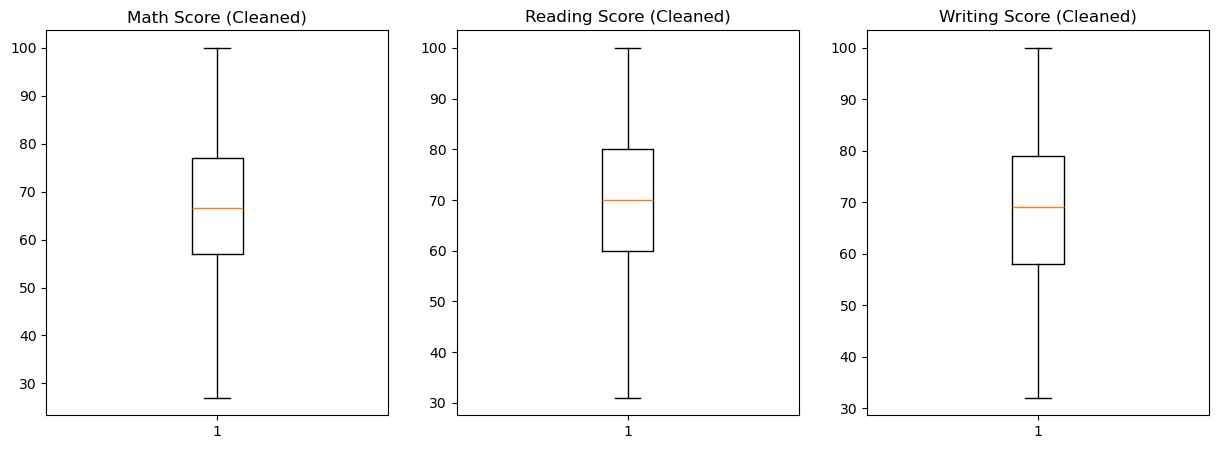

In [12]:
#Question 2 - Box Plot with removed outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = ['math score', 'reading score', 'writing score']
df_cleaned = df.copy()
for column in numeric_columns:
    df_cleaned = remove_outliers(df_cleaned, column)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df_cleaned['math score'])
plt.title('Math Score (Cleaned)')
plt.subplot(1, 3, 2)
plt.boxplot(df_cleaned['reading score'])
plt.title('Reading Score (Cleaned)')
plt.subplot(1, 3, 3)
plt.boxplot(df_cleaned['writing score'])
plt.title('Writing Score (Cleaned)')
plt.show()


ANOVA results for math score:

Category: gender, F-Value: 23.42, p-Value: 1.53e-06
Category: race/ethnicity, F-Value: 16.00, p-Value: 1.13e-12
Category: parental level of education, F-Value: 4.05, p-Value: 1.20e-03
Category: lunch, F-Value: 88.73, p-Value: 3.42e-20
Category: test preparation course, F-Value: 21.31, p-Value: 4.46e-06
ANOVA results for reading score:

Category: gender, F-Value: 92.06, p-Value: 7.38e-21
Category: race/ethnicity, F-Value: 5.40, p-Value: 2.65e-04
Category: parental level of education, F-Value: 6.88, p-Value: 2.57e-06
Category: lunch, F-Value: 25.43, p-Value: 5.50e-07
Category: test preparation course, F-Value: 47.44, p-Value: 1.04e-11
ANOVA results for writing score:

Category: gender, F-Value: 150.27, p-Value: 3.80e-32
Category: race/ethnicity, F-Value: 6.79, p-Value: 2.20e-05
Category: parental level of education, F-Value: 12.08, p-Value: 2.33e-11
Category: lunch, F-Value: 31.53, p-Value: 2.58e-08
Category: test preparation course, F-Value: 93.59, p-Value

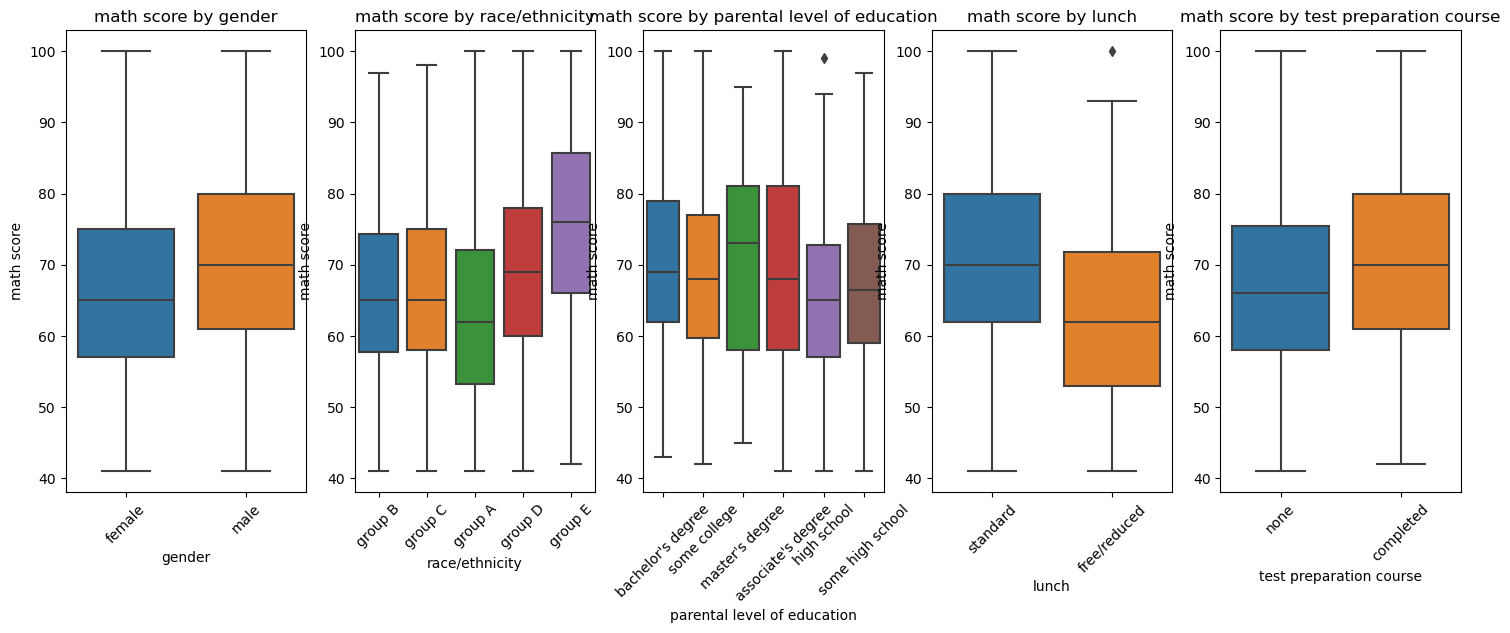

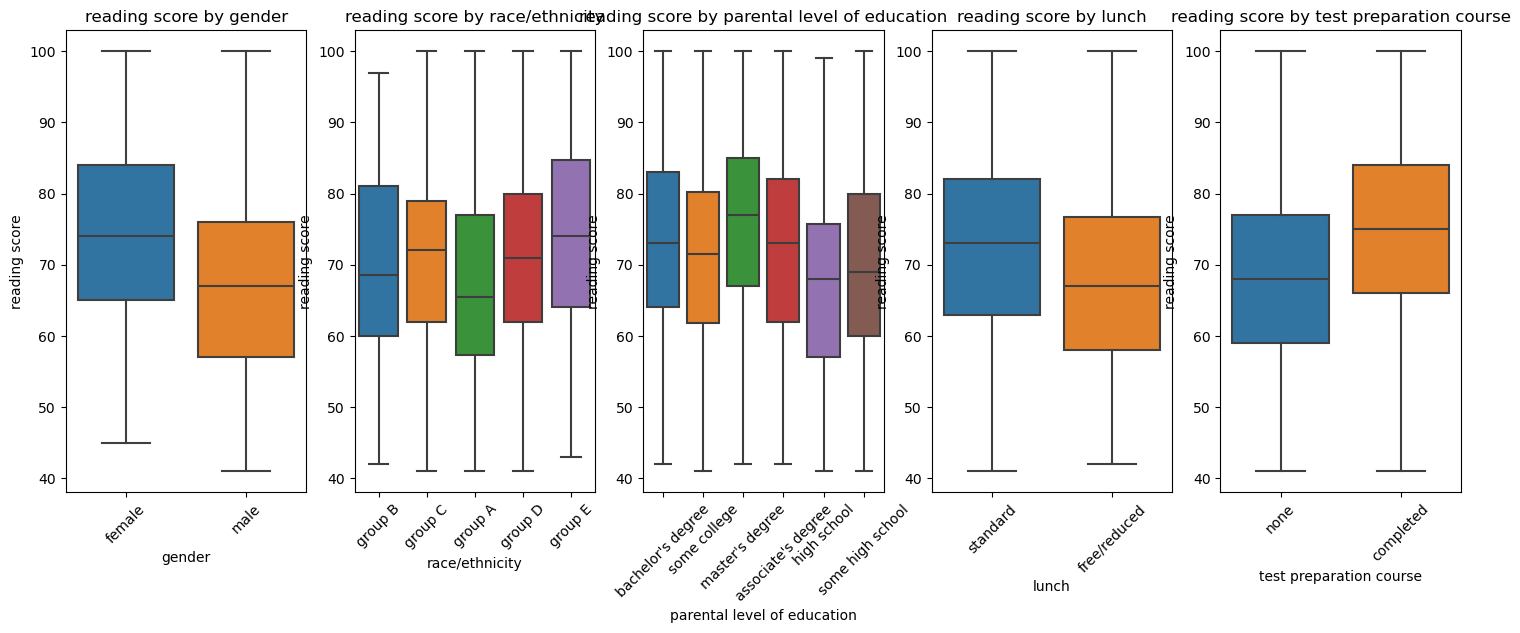

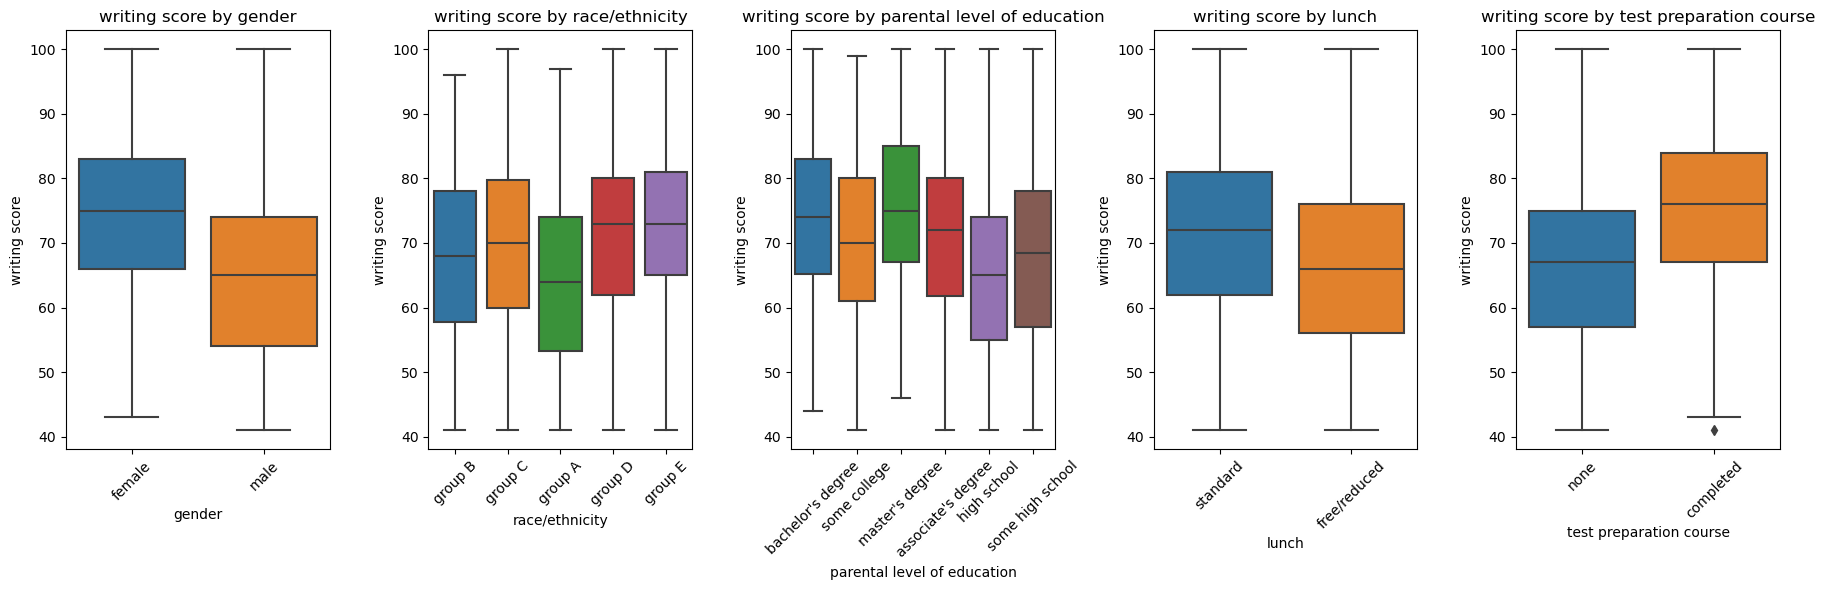

In [24]:
df = df[(df['math score'] > 40) & (df['reading score'] > 40) & (df['writing score'] > 40)]

def perform_anova(df, score, category):
    anova_result = f_oneway(*[df[score][df[category] == level] for level in df[category].unique()])
    return anova_result

numeric_columns = ['math score', 'reading score', 'writing score']
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for score in numeric_columns:
    print(f"ANOVA results for {score}:\n")
    for category in categorical_columns:
        anova_result = perform_anova(df, score, category)
        print(f"Category: {category}, F-Value: {anova_result.statistic:.2f}, p-Value: {anova_result.pvalue:.2e}")
    
    plt.figure(figsize=(18, 6))
    for i, category in enumerate(categorical_columns):
        plt.subplot(1, len(categorical_columns), i+1)
        sns.boxplot(x=category, y=score, data=df)
        plt.title(f'{score} by {category}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
#Question 3 - Variance - No features have a variance below the threshold.
df = pd.read_csv('StudentsPerformance.csv')

one_hot_columns = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

label_encoder = LabelEncoder()
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])

X = df.drop(['math score', 'reading score', 'writing score'], axis=1)

variance = X.var()

print("Variance of each feature:\n", variance)

threshold = 0.01 
low_variance_features = variance[variance < threshold].index
print("\nFeatures with low variance (variance < 0.01):\n", low_variance_features)

Variance of each feature:
 parental level of education     3.347151
gender_male                     0.249926
race/ethnicity_group B          0.154054
race/ethnicity_group C          0.217456
race/ethnicity_group D          0.193550
race/ethnicity_group E          0.120521
lunch_standard                  0.229204
test preparation course_none    0.230066
dtype: float64

Features with low variance (variance < 0.01):
 Index([], dtype='object')


In [18]:
#Question 3 - Any irrelevant features?
No, there are no irrelevant features.

SyntaxError: invalid syntax (4828391.py, line 2)

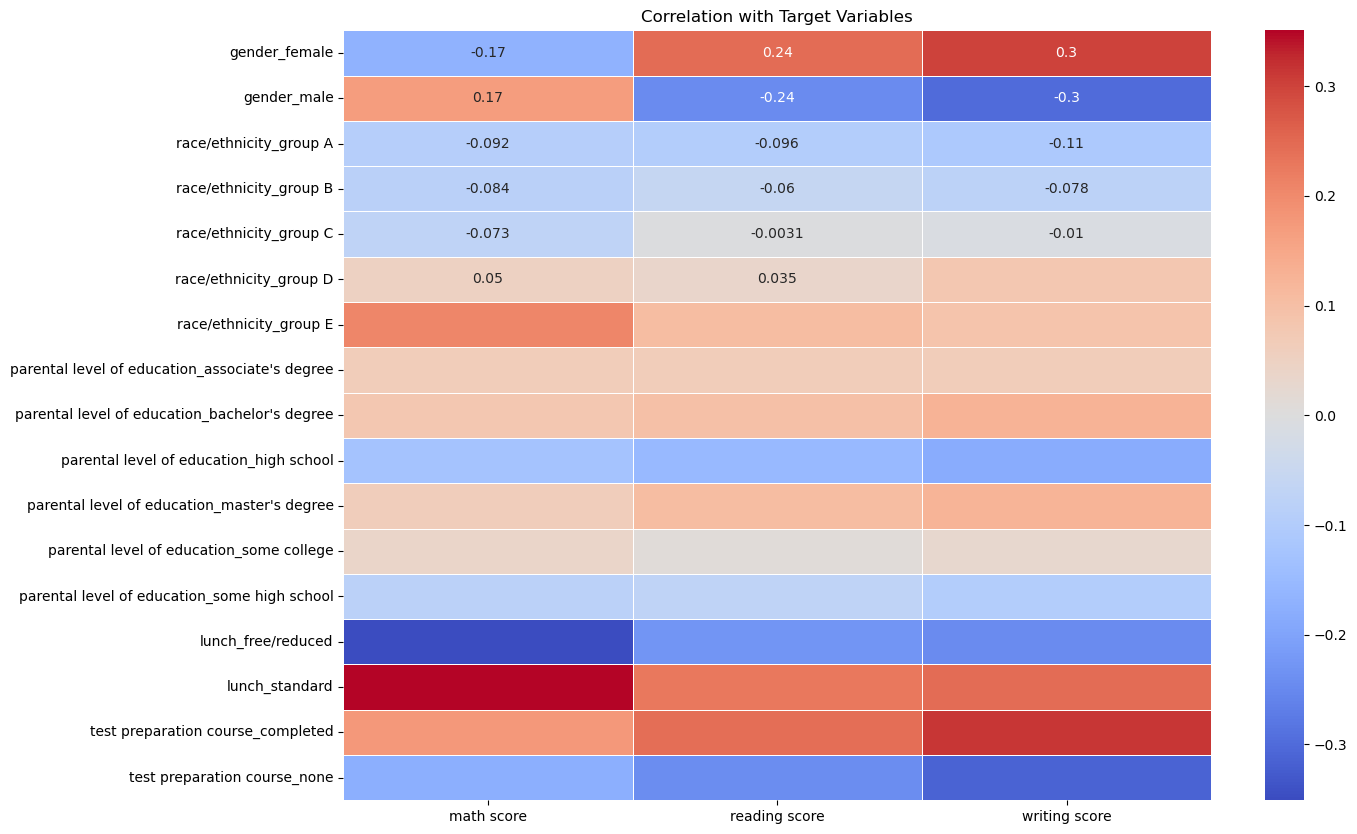

Correlation with Target Variables:
                                                math score  reading score  \
gender_female                                    -0.167982       0.244313   
gender_male                                       0.167982      -0.244313   
race/ethnicity_group A                           -0.091977      -0.096274   
race/ethnicity_group B                           -0.084250      -0.060283   
race/ethnicity_group C                           -0.073387      -0.003074   
race/ethnicity_group D                            0.050071       0.035177   
race/ethnicity_group E                            0.205855       0.106712   
parental level of education_associate's degree    0.063228       0.064386   
parental level of education_bachelor's degree     0.079664       0.096024   
parental level of education_high school          -0.128725      -0.151068   
parental level of education_master's degree       0.060417       0.106452   
parental level of education_some college 

In [46]:
#Question 3 - Correlation

df = pd.read_csv('StudentsPerformance.csv')

categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

target_columns = ['math score', 'reading score', 'writing score']
correlations_with_targets = df_encoded.corr()[target_columns]

correlations_with_targets = correlations_with_targets.drop(target_columns)

plt.figure(figsize=(14, 10))
sns.heatmap(correlations_with_targets, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Target Variables')
plt.show()

print("Correlation with Target Variables:")
print(correlations_with_targets)

In [ ]:
#Question 3 - Does ANOVA require normalized or standardized data?
No, ANOVA does not require normalized or standardized data.

In [ ]:
#Question 3 - Are there any categorical variables that need to be changed to dummy variables?
Everything that needed to be changed has already been changed.

In [71]:
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

X = df_encoded.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df_encoded[['math score', 'reading score', 'writing score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_scores = {}
for i, score in enumerate(['math score', 'reading score', 'writing score']):
    r2_scores[score] = r2_score(y_test.iloc[:, i], y_pred[:, i])

print("R-squared scores for each target variable:")
for score, r2 in r2_scores.items():
    print(f"{score}: {r2:.4f}")


R-squared scores for each target variable:
math score: 0.1748
reading score: 0.1591
writing score: 0.2620


In [ ]:
#Question 4 - Does the data need to be balanced?
No, the data does not need to be balanced since the target variables are not a categorical class.

In [ ]:
#Question 4 - train_test_split or cross validation?
I used train_test_split because it provided a high r-squared score than cross-validation.

In [ ]:
#Question 4 - Which algorithm is appropriate for this problem?
I used linear regression for its simplicity.

In [ ]:
#Question 4 - Which metrics do you use to evaluate the prediction model?
I used r-squared score to determine the variance in the dependent variable from the independent variables.

In [ ]:
#Question 4 - Low R-Squared Score
I think the reason for the low r-squared score is the complexity of the relationships. I tried 5 different databases, and could not get any of them to have an r-squared score above 75%.
I tried to keep this
